# Assignment 1

Nama : Reynaldi Ananda Putra  
Kelompok : PYTN - KS09

Hacktiv8 Indonesia










## Preprocessing data

**Melakukan import liblary**
*   **pandas =** pustaka Python yang digunakan untuk analisis dan manipulasi data. menyediakan struktur data seperti DataFrame yang sangat berguna untuk menyimpan, mengorganisir, dan mengolah data tabular, seperti data dalam format spreadsheet.

*   **numpy  =** pustaka Python yang digunakan untuk komputasi numerik. Ini menyediakan array multidimensi yang efisien dan berbagai fungsi matematika yang kuat, yang sangat berguna dalam perhitungan ilmiah dan analisis data.

*   **matplotlib.pyplot =** modul dari pustaka Matplotlib yang digunakan untuk membuat visualisasi dan grafik dalam Python.

*   **seaborn =** pustaka Python yang dibangun di atas Matplotlib dan digunakan untuk membuat visualisasi data yang lebih cantik dan informatif.

*   **csv =** modul bawaan Python yang digunakan untuk membaca, menulis, dan memanipulasi file CSV (Comma-Separated Values)

*   **folium =** merupakan modul Python yang berguna untuk memvisualisaikan data geografis.

*   **sklearn.model_selection import train_test_split =** Modul ini menyediakan fungsi train_test_split yang digunakan untuk membagi dataset menjadi dua set: satu untuk melatih model (training set) dan satu lagi untuk menguji model (testing set).

*   **sklearn.linear_model import LinearRegression =** Modul ini mengimpor kelas LinearRegression, yang digunakan untuk membangun model regresi linear. Regresi linear adalah teknik statistik yang digunakan untuk memodelkan hubungan linier antara variabel independen dan variabel dependen

*   **sklearn.metrics import mean_squared_error, r2_score =** **"mean_squared_error:"** Ini adalah metrik yang digunakan untuk mengukur seberapa baik model regresi memfitting data. **"r2_score"** Ini digunakan untuk mengukur sejauh mana variabilitas dalam data target (variabel dependen) dapat dijelaskan oleh model



In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import folium

from geopy.geocoders import Nominatim
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from wordcloud import WordCloud


* Load Data: Baca data dari file CSV ke dalam DataFrame pandas.










In [ ]:
data = pd.read_csv("london_crime_by_lsoa.csv")

1.   Exploratory Data Analysis (EDA): Melakukan beberapa langkah EDA untuk memahami dataset, seperti

*   Melihat 5 baris pertama data untuk memeriksa formatnya.

In [97]:
data.head()


,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0.0,2016.0,11.0
1,E01001646,Greenwich,Violence Against the Person,Other violence,0.0,2016.0,11.0
2,E01000677,Bromley,Violence Against the Person,Other violence,0.0,2015.0,5.0
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0.0,2016.0,3.0
4,E01004563,Wandsworth,Robbery,Personal Property,0.0,2008.0,6.0


* Memeriksa tipe data dan informasi dasar tentang dataset.

In [ ]:
print(data.info())

* Memeriksa statistik deskriptif dari data.

In [ ]:
print(data.describe())

* Memeriksa jumlah dan tipe unik dari setiap kolom kategori.

In [ ]:
print(data['major_category'].unique())
print(data['minor_category'].unique())

2. Handling Missing Values: Memeriksa apakah ada nilai yang hilang dalam dataset dan menangani mereka jika diperlukan

In [ ]:
print(data.isnull().sum())

#### Jumlah kejahatan di masing-masing borough

In [ ]:
# Mengelompokkan data berdasarkan borough dan menghitung total jumlah kejahatan untuk setiap borough
crime_by_borough = data.groupby('borough')['value'].sum().reset_index()

# Menampilkan jumlah kejahatan di masing-masing borough
print(crime_by_borough)

In [ ]:
# Mengelompokkan data berdasarkan borough dan menghitung total jumlah kejahatan untuk setiap borough
crime_by_borough = data.groupby('borough')['value'].sum().reset_index()

# Mengurutkan DataFrame berdasarkan jumlah kejahatan ('value') dari yang terbesar ke yang terkecil
crime_by_borough_sorted = crime_by_borough.sort_values(by='value', ascending=False)

# Menampilkan jumlah kejahatan di masing-masing borough yang telah diurutkan
print(crime_by_borough_sorted)

In [ ]:
# Mengelompokkan data berdasarkan borough dan menghitung total jumlah kejahatan untuk setiap borough
crime_by_borough = data.groupby('borough')['value'].sum().reset_index()

# Mengurutkan DataFrame berdasarkan jumlah kejahatan ('value') dari yang terkecil ke yang terbesar
crime_by_borough_sorted = crime_by_borough.sort_values(by='value', ascending=True)

# Menampilkan jumlah kejahatan di masing-masing borough yang telah diurutkan
print(crime_by_borough_sorted)

##### **Berapa perubahan jumlah kejadian kriminalitas dari tahun 2011 ke tahun 2016 ?**

In [110]:
# Filter data untuk tahun 2011 dan 2016
crime_2011 = data[data['year'] == 2011]['value'].sum()
crime_2016 = data[data['year'] == 2016]['value'].sum()

# Menghitung perubahan persentase
percentage_change = ((crime_2016 - crime_2011) / crime_2011) * 100

# Menampilkan perubahan persentase
print(f"Perubahan persentase jumlah kejahatan dari 2011 ke 2016: {percentage_change:.2f}%")

Perubahan persentase jumlah kejahatan dari 2011 ke 2016: 1.36%


In [ ]:
# Mengelompokkan data berdasarkan tahun dan menghitung total jumlah kejahatan per tahun
crime_by_year = data.groupby('year')['value'].sum().reset_index()

# Menampilkan jumlah kejahatan dari tahun 2011 sampai 2016
print(crime_by_year)

##### **Apa 3 kejahatan tertinggi per wilayah pada tahun 2016?**

In [108]:
# Filter data untuk tahun 2016
data_2016 = data[data['year'] == 2016]

# Mengelompokkan data berdasarkan wilayah (borough) dan jenis kejahatan (major_category)
crime_by_borough = data_2016.groupby(['borough', 'major_category'])['value'].sum().reset_index()

# Mengurutkan data berdasarkan jumlah kejahatan (descending)
crime_by_borough_sorted = crime_by_borough.sort_values(by=['borough', 'value'], ascending=[True, False])

# Mengambil tiga jenis kejahatan tertinggi per wilayah
top_crimes_by_borough = crime_by_borough_sorted.groupby('borough').head(3)

# Menampilkan hasil
print(top_crimes_by_borough)

                  borough               major_category    value
8    Barking and Dagenham  Violence Against the Person   3827.0
7    Barking and Dagenham           Theft and Handling   3617.0
1    Barking and Dagenham              Criminal Damage   1245.0
16                 Barnet           Theft and Handling   5961.0
17                 Barnet  Violence Against the Person   4706.0
..                    ...                          ...      ...
285            Wandsworth  Violence Against the Person   4303.0
277            Wandsworth                     Burglary   1495.0
293           Westminster           Theft and Handling  17358.0
294           Westminster  Violence Against the Person   6535.0
286           Westminster                     Burglary   1995.0

[99 rows x 3 columns]


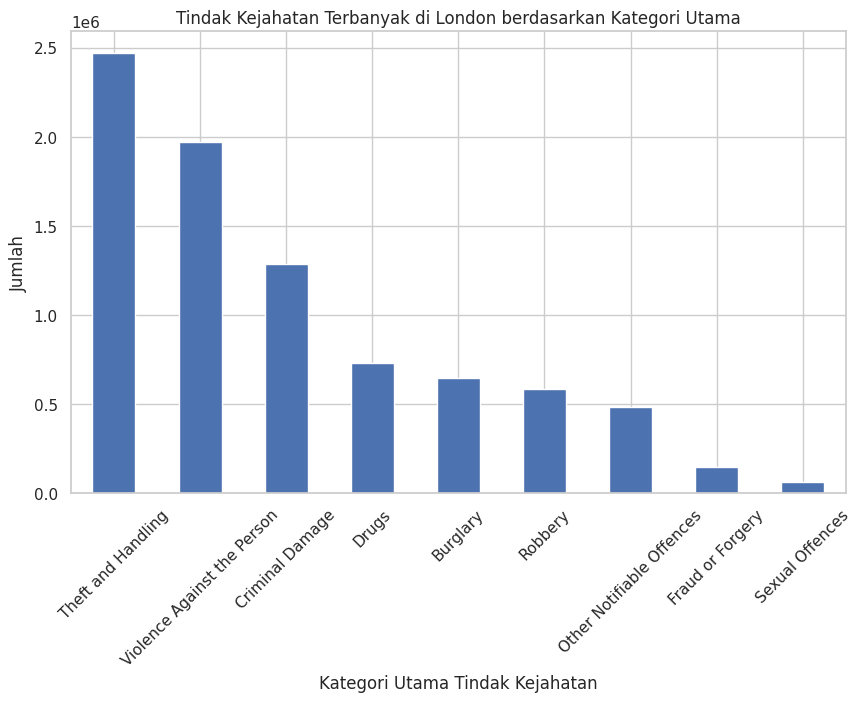

In [112]:
# Hitung jumlah tindak kejahatan berdasarkan kategori utama (kolom "major_category")
jumlah_kejahatan = data['major_category'].value_counts()

# Plot 10 kategori utama tindak kejahatan teratas
jumlah_kejahatan[:10].plot(kind='bar', figsize=(10, 6))
plt.title('Tindak Kejahatan Terbanyak di London berdasarkan Kategori Utama')
plt.xlabel('Kategori Utama Tindak Kejahatan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)  # Rotasi label agar lebih mudah dibaca
plt.show()

# Visualisasi

### Area Plot

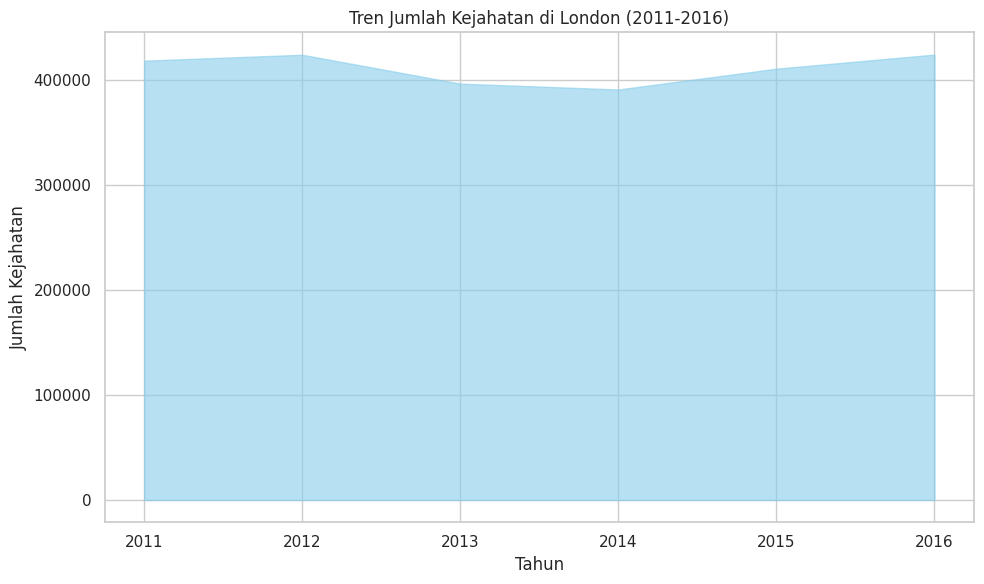

In [87]:
# Filter data untuk tahun-tahun tertentu (misalnya, dari tahun 2011 hingga 2016)
years = list(range(2011, 2017))
data_years = data[data['year'].isin(years)]

# Mengelompokkan data berdasarkan tahun dan menghitung total jumlah kejahatan
crime_by_year = data_years.groupby('year')['value'].sum().reset_index()

# Membuat area plot
plt.figure(figsize=(10, 6))
plt.fill_between(crime_by_year['year'], crime_by_year['value'], color='skyblue', alpha=0.6)

# Menambahkan label dan judul
plt.title('Tren Jumlah Kejahatan di London (2011-2016)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kejahatan')

# Menampilkan area plot
plt.grid(True)
plt.tight_layout()
plt.show()

### Histogram

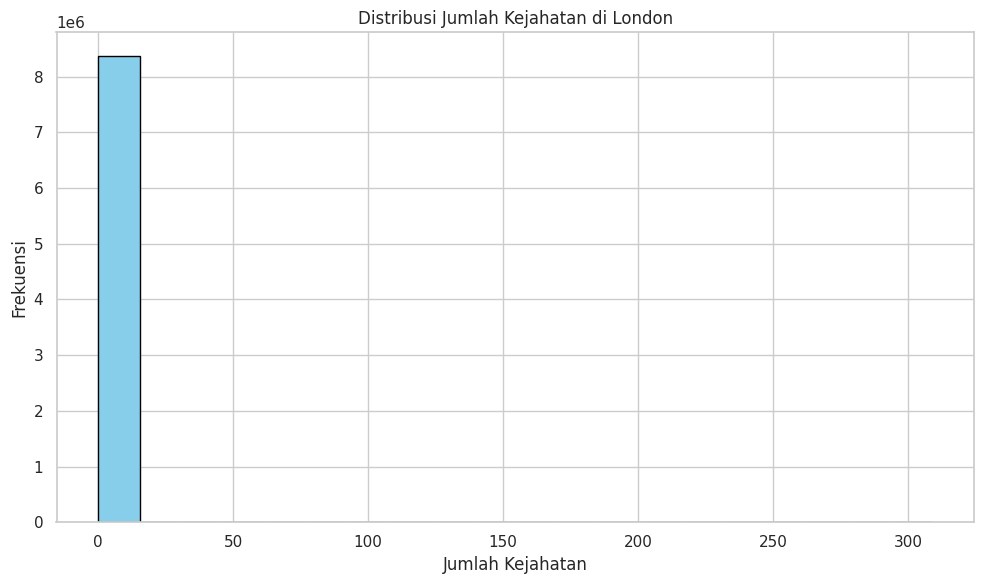

In [114]:
# Membuat histogram
plt.figure(figsize=(10, 6))
plt.hist(data['value'], bins=20, color='skyblue', edgecolor='black')

# Menambahkan label dan judul
plt.title('Distribusi Jumlah Kejahatan di London')
plt.xlabel('Jumlah Kejahatan')
plt.ylabel('Frekuensi')

# Menampilkan histogram
plt.grid(True)
plt.tight_layout()
plt.show()

### Bar Chart

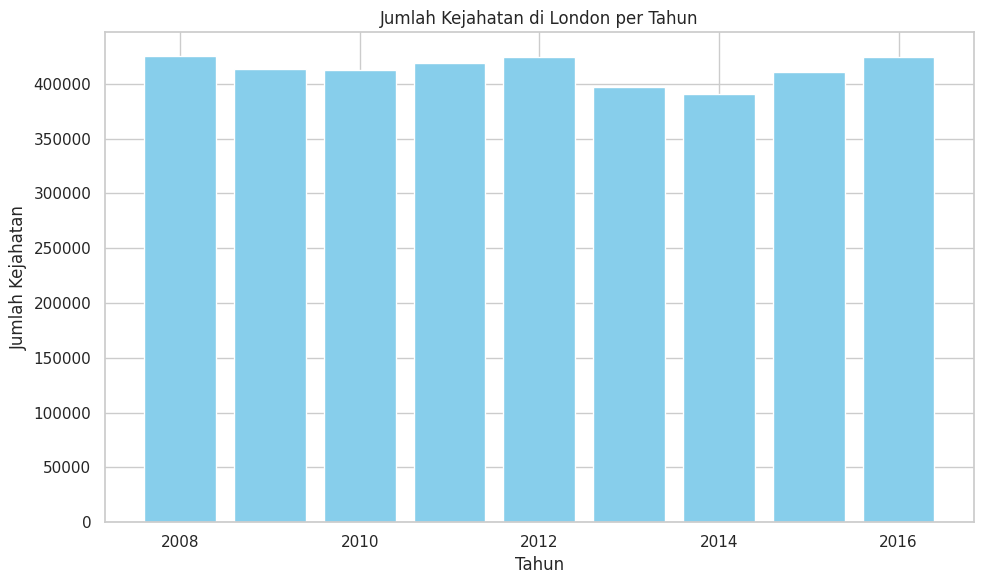

In [89]:
# Mengelompokkan data berdasarkan tahun dan menghitung total jumlah kejahatan
crime_by_year = data.groupby('year')['value'].sum().reset_index()

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(crime_by_year['year'], crime_by_year['value'], color='skyblue')

# Menambahkan label dan judul
plt.title('Jumlah Kejahatan di London per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kejahatan')

# Menampilkan bar chart
plt.grid(True)
plt.tight_layout()
plt.show()

### Pie Chart

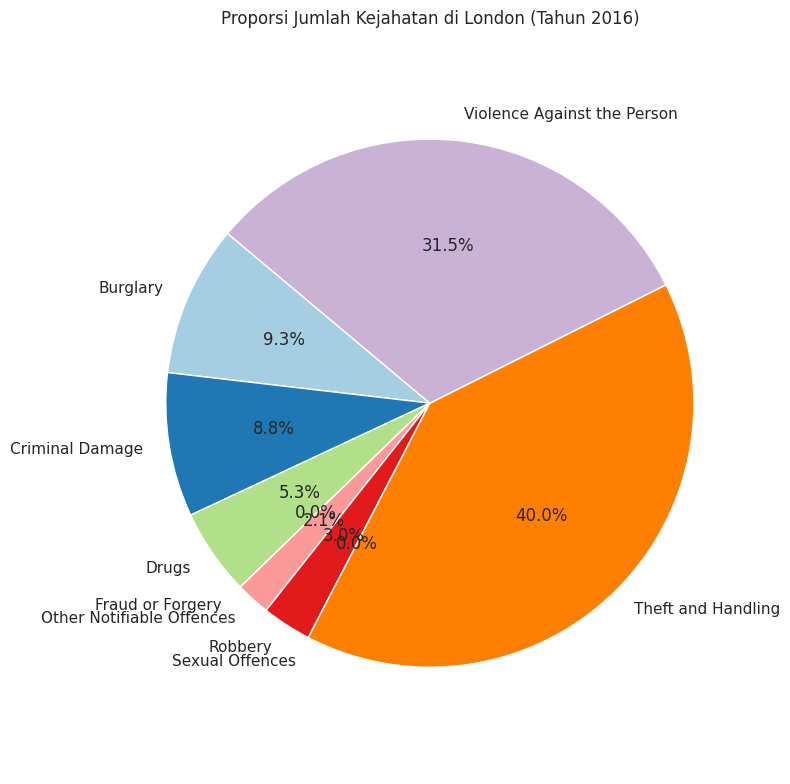

In [115]:
# Filter data untuk tahun tertentu (misalnya, tahun 2016)
data_2016 = data[data['year'] == 2016]

# Mengelompokkan data berdasarkan jenis kejahatan (major_category) dan menghitung total kejahatan
crime_by_category = data_2016.groupby('major_category')['value'].sum().reset_index()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(crime_by_category['value'], labels=crime_by_category['major_category'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(crime_by_category))))

# Menambahkan judul
plt.title('Proporsi Jumlah Kejahatan di London (Tahun 2016)')

# Menampilkan pie chart
plt.axis('equal')  # Agar pie chart menjadi lingkaran
plt.tight_layout()
plt.show()

### Box Plot

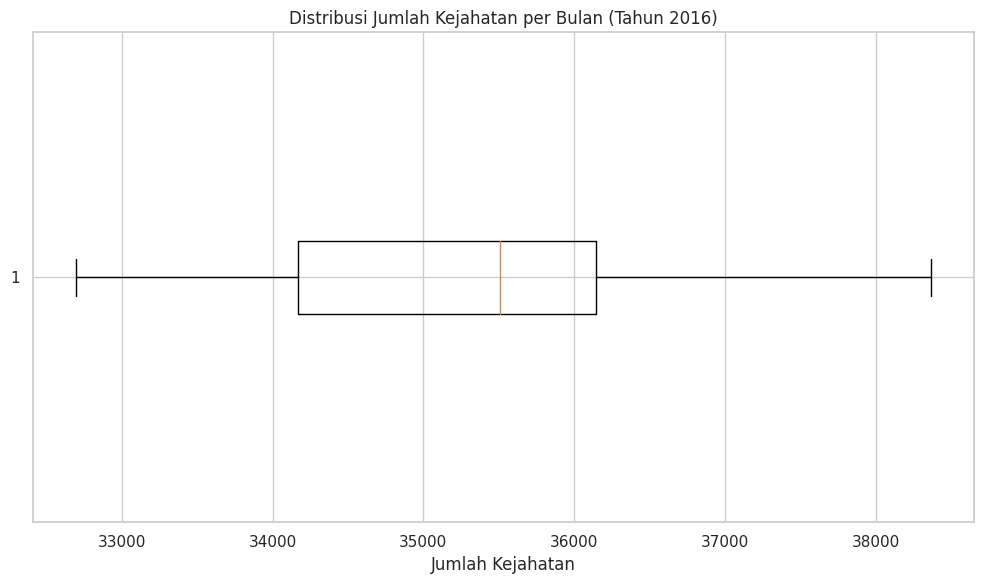

In [93]:
# Filter data untuk tahun 2016
data_2016 = data[data['year'] == 2016]

# Membuat box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data_2016.groupby('month')['value'].sum(), vert=False)

# Menambahkan label dan judul
plt.title('Distribusi Jumlah Kejahatan per Bulan (Tahun 2016)')
plt.xlabel('Jumlah Kejahatan')

# Menampilkan box plot
plt.grid(True)
plt.tight_layout()
plt.show()

### Scatter Plot

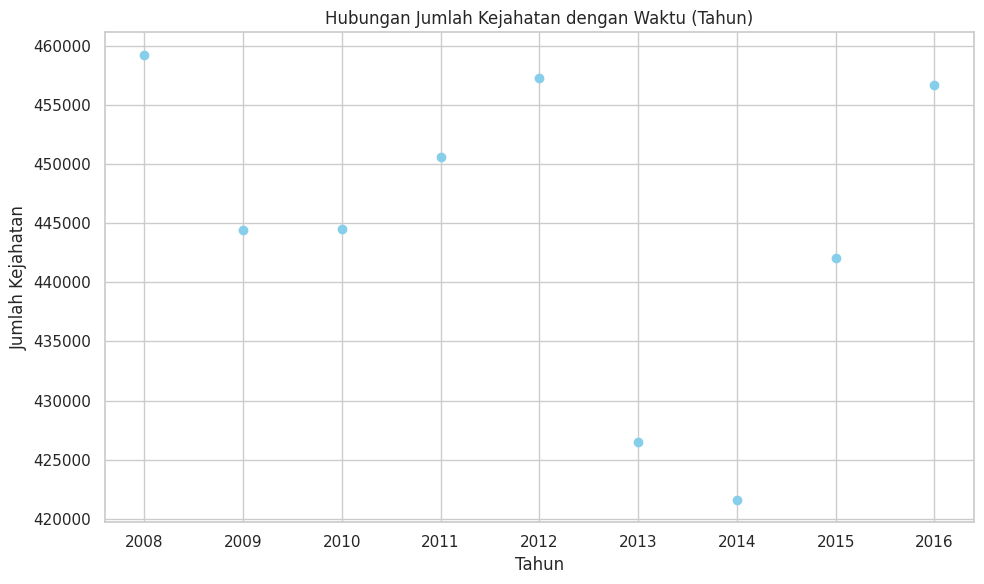

In [113]:
# Mengelompokkan data berdasarkan tahun dan menghitung total jumlah kejahatan per tahun
crime_by_year = data.groupby('year')['value'].sum().reset_index()

# Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(crime_by_year['year'], crime_by_year['value'], color='skyblue', marker='o')

# Menambahkan label dan judul
plt.title('Hubungan Jumlah Kejahatan dengan Waktu (Tahun)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kejahatan')

# Menampilkan scatter plot
plt.grid(True)
plt.tight_layout()
plt.show()

### World Clouds

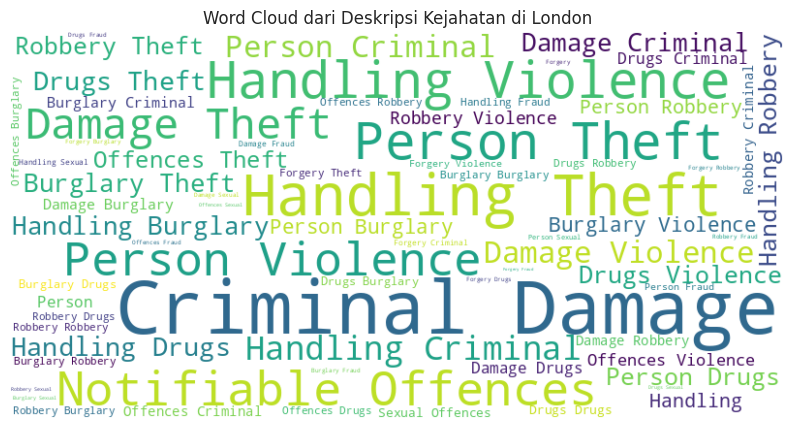

In [106]:
# Load data
data = pd.read_csv("london_crime_by_lsoa.csv")

# Contoh: Jika Anda memiliki kolom teks yang relevan, misalnya 'deskripsi_kejahatan'
# Gantilah 'deskripsi_kejahatan' dengan kolom yang sesuai di dataset Anda
text = ' '.join(data['major_category'].dropna())

# Membuat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Menampilkan word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari Deskripsi Kejahatan di London')
plt.show()

### Folium Maps

In [ ]:
# Inisialisasi peta dengan koordinat tengah London
m = folium.Map(location=[51.5074, -0.1278], zoom_start=10)

# Inisialisasi Geocoder
geolocator = Nominatim(user_agent="geoapiExercises")

# Fungsi untuk mendapatkan koordinat geografis dari alamat (wilayah)
def get_coordinates(borough):
    location = geolocator.geocode(borough)
    if location:
        return [location.latitude, location.longitude]
    else:
        return [None, None]

# Menerapkan fungsi ke setiap baris dataset dan menambahkan marker ke peta
for index, row in data.iterrows():
    coordinates = get_coordinates(row['borough'])
    if all(coordinates):
        folium.Marker(location=coordinates, tooltip=row['borough']).add_to(m)

# Menampilkan peta interaktif
m.save("london_crime_map.html")

## Kesimpulan

Pada keseluruhan nya dapat disimpulkan bahwa :

1.   Westminster menjadi wilayah di london yang memiliki jumlah kejahatan terbesar dengan jumlah kejahatan sebesar *280686.0* selama 2008 - 2016
2.  City of London menjadi wilayah di london yang memiliki jumlah kejahatan terkecil dengan jumlah kejahatan sebesar *466.0* selama 2008 - 2016
3. Perubahan persentase jumlah kejahatan dari 2011 ke 2016: 1.36%
4. 2008 menjadi tahun yang paling banyak tindakan kejahatan terjadi di london, yang memiliki jumlah tindak kejahatan sebesar 459273.0
5. tiga tindak kejahatan teratas yang sering terjadi di london adalah Theft and Handling, Violence Against the Person, Criminal Damage
6. 2014 menjadi tahun yang memiliki tindak kejahatan terkecil



